<a href="https://colab.research.google.com/github/nidhi-158/AirQuality/blob/main/Air_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_excel("/content/AirQualityUCI.xlsx", sheet_name=0)

In [3]:
df.shape

(9357, 15)

In [4]:
df.describe()

,Date,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,2004-09-21 04:30:05.193972480,-34.207524,1048.869652,-159.090093,1.865576,894.475963,168.604200,794.872333,58.135898,1391.363266,974.951534,9.776600,39.483611,-6.837604
min,2004-03-10 00:00:00,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,2004-06-16 00:00:00,0.600000,921.000000,-200.000000,4.004958,711.000000,50.000000,637.000000,53.000000,1184.750000,699.750000,10.950000,34.050000,0.692275
50%,2004-09-21 00:00:00,1.500000,1052.500000,-200.000000,7.886653,894.500000,141.000000,794.250000,96.000000,1445.500000,942.000000,17.200000,48.550000,0.976823
75%,2004-12-28 00:00:00,2.600000,1221.250000,-200.000000,13.636091,1104.750000,284.200000,960.250000,133.000000,1662.000000,1255.250000,24.075000,61.875000,1.296223
max,2005-04-04 00:00:00,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036
std,NaN,77.657170,329.817015,139.789093,41.380154,342.315902,257.424561,321.977031,126.931428,467.192382,456.922728,43.203438,51.215645,38.976670


In [5]:
df.isnull().sum()

,0
Date,0
Time,0
CO(GT),0
PT08.S1(CO),0
NMHC(GT),0
C6H6(GT),0
PT08.S2(NMHC),0
NOx(GT),0
PT08.S3(NOx),0
NO2(GT),0


In [6]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [7]:
df.replace(-200,np.nan,inplace=True)

In [8]:
df.isnull().sum()

,0
Date,0
Time,0
CO(GT),1683
PT08.S1(CO),366
NMHC(GT),8443
C6H6(GT),366
PT08.S2(NMHC),366
NOx(GT),1639
PT08.S3(NOx),366
NO2(GT),1642


In [9]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150.0,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112.0,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88.0,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80.0,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51.0,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [10]:
df.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')

In [11]:
df['datetime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'].astype(str))

In [12]:
df['hour'] = df['datetime'].dt.hour
df['dayofweek'] = df['datetime'].dt.dayofweek

In [13]:
df.drop(columns=['Date','Time'])

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,datetime,hour,dayofweek
0,2.6,1360.00,150.0,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754,2004-03-10 18:00:00,18,2
1,2.0,1292.25,112.0,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487,2004-03-10 19:00:00,19,2
2,2.2,1402.00,88.0,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239,2004-03-10 20:00:00,20,2
3,2.2,1375.50,80.0,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713,2004-03-10 21:00:00,21,2
4,1.6,1272.25,51.0,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794,2004-03-10 22:00:00,22,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,3.1,1314.25,NaN,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824,2005-04-04 10:00:00,10,0
9353,2.4,1162.50,NaN,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864,2005-04-04 11:00:00,11,0
9354,2.4,1142.00,NaN,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649,2005-04-04 12:00:00,12,0
9355,2.1,1002.50,NaN,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866,2005-04-04 13:00:00,13,0


In [14]:
columns_to_fill=['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH']

In [15]:
for col in columns_to_fill:
  mean_value=df[col].mean()
  df[col].fillna(mean_value,inplace=True)

<ipython-input-15-e0401033f4fd>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mean_value,inplace=True)


In [16]:
df.isnull().sum()

,0
Date,0
Time,0
CO(GT),0
PT08.S1(CO),0
NMHC(GT),0
C6H6(GT),0
PT08.S2(NMHC),0
NOx(GT),0
PT08.S3(NOx),0
NO2(GT),0


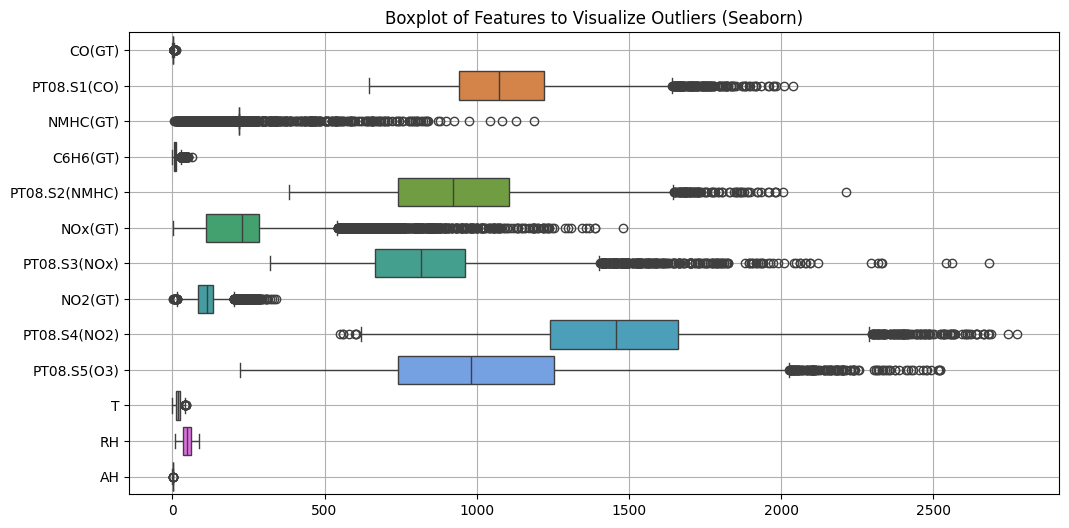

In [17]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[columns_to_fill], orient='h')
plt.title("Boxplot of Features to Visualize Outliers (Seaborn)")
plt.grid(True)
plt.show()

In [18]:
# Handling outliers
Q1 = df[columns_to_fill].quantile(0.25)
Q3 = df[columns_to_fill].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_no_outliers = df[((df[columns_to_fill] >= lower_bound) &
                     (df[columns_to_fill] <= upper_bound)).all(axis=1)]

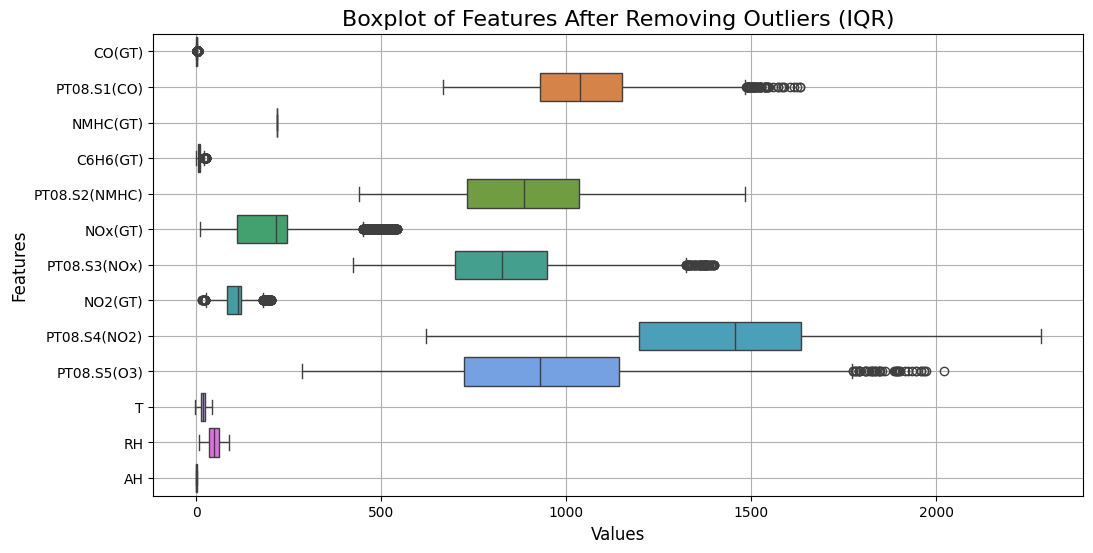

In [19]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_no_outliers[columns_to_fill], orient='h')
plt.title("Boxplot of Features After Removing Outliers (IQR)", fontsize=16)
plt.xlabel("Values", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.grid(True)
plt.show()

In [20]:
# Define input (X) and output (y) features
X = df_no_outliers[['PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)',
                    'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH', 'hour', 'dayofweek']]
y = df_no_outliers[['CO(GT)', 'NMHC(GT)', 'NOx(GT)', 'NO2(GT)', 'C6H6(GT)']]

In [21]:
# Scaling
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

In [22]:
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

In [23]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

In [24]:
model=RandomForestRegressor()

In [25]:
model.fit(X_train,y_train)

RandomForestRegressor()

In [26]:
y_pred=model.predict(X_test)

In [27]:
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

In [28]:
print(f"Mean squared error: {mse}")
print(f"R-squared: {r2}")

Mean squared error: 0.007708866537044616
R-squared: 0.7970145329006659


In [40]:
# Define categorization function with custom thresholds
def categorize_quality_CO(value):
    if value < 300:
        return "Good"
    elif 300 <= value < 700:
        return "Moderate"
    else:
        return "Bad"

def categorize_quality_NMHC(value):
    if value < 100:
        return "Good"
    elif 100 <= value < 300:
        return "Moderate"
    else:
        return "Bad"

def categorize_quality_NOx(value):
    if value < 300:
        return "Good"
    elif 300 <= value < 700:
        return "Moderate"
    else:
        return "Bad"

def categorize_quality_NO2(value):
    if value < 300:
        return "Good"
    elif 300 <= value < 700:
        return "Moderate"
    else:
        return "Bad"

def categorize_quality_O3(value):
    if value < 100:
        return "Good"
    elif 100 <= value < 300:
        return "Moderate"
    else:
        return "Bad"

In [41]:
# Function to take user input and predict air quality
def get_user_input():
    print("Please enter the following values for air quality prediction:")

    PT08_S1_CO = float(input("PT08.S1(CO): "))
    PT08_S2_NMHC = float(input("PT08.S2(NMHC): "))
    PT08_S3_NOx = float(input("PT08.S3(NOx): "))
    PT08_S4_NO2 = float(input("PT08.S4(NO2): "))
    PT08_S5_O3 = float(input("PT08.S5(O3): "))
    T = float(input("Temperature (T): "))
    RH = float(input("Relative Humidity (RH): "))
    AH = float(input("Absolute Humidity (AH): "))
    hour = int(input("Hour (0-23): "))
    dayofweek = int(input("Day of the week (0=Monday, 6=Sunday): "))

    user_input = pd.DataFrame({
        'PT08.S1(CO)': [PT08_S1_CO],
        'PT08.S2(NMHC)': [PT08_S2_NMHC],
        'PT08.S3(NOx)': [PT08_S3_NOx],
        'PT08.S4(NO2)': [PT08_S4_NO2],
        'PT08.S5(O3)': [PT08_S5_O3],
        'T': [T],
        'RH': [RH],
        'AH': [AH],
        'hour': [hour],
        'dayofweek': [dayofweek]
    })

    return user_input

# Function to predict air quality from user input
def predict_air_quality(model, user_input, scaler_X, scaler_y):
    # Scale the user input
    scaled_input = scaler_X.transform(user_input)

    # Predict the output (scaled)
    y_pred_scaled = model.predict(scaled_input)

    # Inverse scale the prediction
    y_pred = scaler_y.inverse_transform(y_pred_scaled)

    return y_pred

In [42]:
# Get user input
user_input = get_user_input()

# Predict the air quality
predicted_values = predict_air_quality(model, user_input, scaler_X, scaler_y)

# Display results for each feature
features = ['CO(GT)', 'NMHC(GT)', 'NOx(GT)', 'NO2(GT)', 'C6H6(GT)']
for i, feature in enumerate(features):
    numerical_value = predicted_values[0][i]

    if feature == 'CO(GT)':
        category = categorize_quality_CO(numerical_value)
    elif feature == 'NMHC(GT)':
        category = categorize_quality_NMHC(numerical_value)
    elif feature == 'NOx(GT)':
        category = categorize_quality_NOx(numerical_value)
    elif feature == 'NO2(GT)':
        category = categorize_quality_NO2(numerical_value)
    elif feature == 'C6H6(GT)':
        category = categorize_quality_O3(numerical_value)

    print(f"Predicted {feature}: {numerical_value:.2f} ({category})")

Please enter the following values for air quality prediction:
PT08.S1(CO): 1030
PT08.S2(NMHC): 1150
PT08.S3(NOx): 1305
PT08.S4(NO2): 1246
PT08.S5(O3): 1265
Temperature (T): 16
Relative Humidity (RH): 60
Absolute Humidity (AH): 0.7
Hour (0-23): 16
Day of the week (0=Monday, 6=Sunday): 4
Predicted CO(GT): 2.89 (Good)
Predicted NMHC(GT): 218.81 (Moderate)
Predicted NOx(GT): 404.37 (Moderate)
Predicted NO2(GT): 142.53 (Good)
Predicted C6H6(GT): 14.26 (Good)
